In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
from pathlib import Path
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

In [12]:
p=Path("/content/drive/My Drive/emotion/Unzipped Files/meld/train/")
dirs= p.glob("*")
labels=[]
mylist=[]
label_dict={"disgust":0,"fear":1,"happy":2,"neutral":3,"sad":4}
for d in dirs:
    label = str(d).split("/")[-1]
    print(label)
    mylist+=os.listdir(d)
    cnt=0
    for audio in d.glob("*.wav"):
      labels.append(label_dict[label])
      cnt+=1
    print(cnt)
    #print(labels)

fear
216
happy
1608
sad
705
disgust
232
neutral
3606


In [4]:
print(type(mylist))
print(len(mylist))
print(mylist)
print(mylist[1800])
#print(mylist[labels])
print(mylist[1500][-7:-4])

<class 'list'>
6367
['MEL_dia782_utt4_negative_FEA.wav', 'MEL_dia177_utt3_negative_FEA.wav', 'MEL_dia455_utt5_negative_FEA.wav', 'MEL_dia915_utt3_negative_FEA.wav', 'MEL_dia923_utt2_negative_FEA.wav', 'MEL_dia921_utt1_negative_FEA.wav', 'MEL_dia844_utt20_negative_FEA.wav', 'MEL_dia184_utt6_negative_FEA.wav', 'MEL_dia788_utt0_negative_FEA.wav', 'MEL_dia130_utt11_negative_FEA.wav', 'MEL_dia576_utt0_negative_FEA.wav', 'MEL_dia316_utt4_negative_FEA.wav', 'MEL_dia953_utt10_negative_FEA.wav', 'MEL_dia840_utt6_negative_FEA.wav', 'MEL_dia460_utt2_negative_FEA.wav', 'MEL_dia178_utt6_negative_FEA.wav', 'MEL_dia854_utt0_negative_FEA.wav', 'MEL_dia654_utt2_negative_FEA.wav', 'MEL_dia217_utt6_negative_FEA.wav', 'MEL_dia301_utt4_negative_FEA.wav', 'MEL_dia827_utt13_negative_FEA.wav', 'MEL_dia720_utt15_negative_FEA.wav', 'MEL_dia869_utt8_negative_FEA.wav', 'MEL_dia623_utt1_negative_FEA.wav', 'MEL_dia351_utt6_negative_FEA.wav', 'MEL_dia275_utt15_negative_FEA.wav', 'MEL_dia743_utt3_negative_FEA.wav', '

In [0]:
data, sampling_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/disgust/MEL_dia1000_utt0_negative_DIS.wav')

(88436,)
<class 'numpy.ndarray'>
[ 2.5342699e-04  1.1929779e-04 -6.8567540e-05 ... -2.6109876e-04
 -2.1419297e-04  0.0000000e+00]


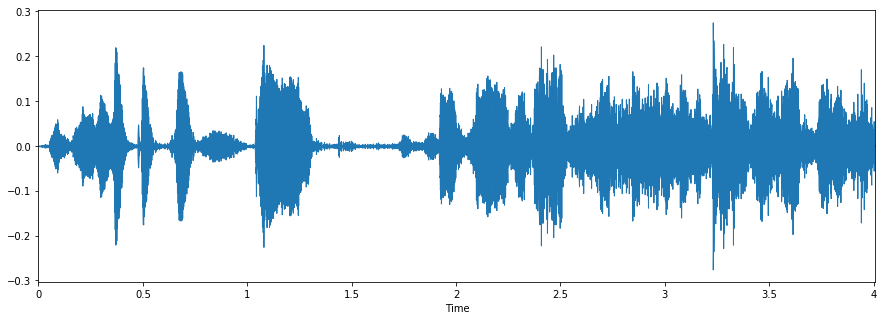

In [0]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
print(data.shape)
print(type(data))
print(data)

16000
(480, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


16000
(480, 1)
16000
(480, 1)
16000
(480, 1)


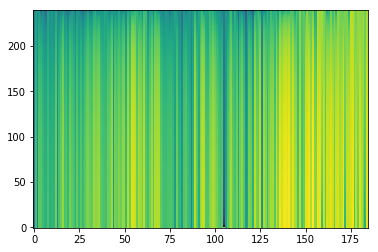

In [0]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

for y in mylist:
    try:
      sr,x = scipy.io.wavfile.read('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'fear'+'/'+y)
      print(sr)
#sr,x = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/fear/MEL_dia46_utt11_negative_FEA.wav')
## Parameters: 10ms step, 30ms window
      nstep = int(sr * 0.01)
      nwin  = int(sr * 0.03)
      nfft = nwin
      window = np.hamming(nwin)
      window=window.reshape((480,1))
      print(window.shape)
## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
      nn = range(nwin, len(x), nstep)

      X = np.zeros( (len(nn), nfft//2) )

      for i,n in enumerate(nn):
         xseg = x[n-nwin:n]
    #xseg=xseg.reshape((960,1))
    #print(xseg.shape)
         z = np.fft.fft((window * xseg), nfft)
         X[i,:] = np.log(np.abs(z[i,:nfft//2]))

      plt.imshow(X.T, interpolation='nearest',
      origin='lower',
      aspect='auto')
      plt.savefig('/content/sound_images/fear.png')
      #plt.show()
    except:
        pass

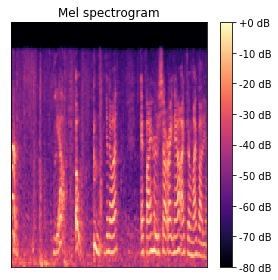

In [0]:

y, sr = librosa.load("/content/drive/My Drive/emotion/Unzipped Files/meld/val/happy/MEL_dia15_utt0_negative_HAP.wav")
S=librosa.feature.melspectrogram(y=y, sr=sr)
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [0]:
import IPython.display as ipd
ipd.Audio('/content/drive/My Drive/emotion/Unzipped Files/meld/val/happy/MEL_dia12_utt11_negative_HAP.wav')

In [0]:
feeling_list=[]
for item in mylist:
    if item[-7:-4]=='DIS':
        feeling_list.append('disgust')
    elif item[-7:-4]=='FEA':
        feeling_list.append('fear')
    elif item[-7:-4]=='HAP':
        feeling_list.append('happy')
    elif item[-7:-4]=='NEU':
        feeling_list.append('neutral')
    elif item[-7:-4]=='SAD':
        feeling_list.append('sad')

In [14]:
addlabels = pd.DataFrame(feeling_list)
addlabels[1500:1510]


,0
1500,happy
1501,happy
1502,happy
1503,happy
1504,happy
1505,happy
1506,happy
1507,happy
1508,happy
1509,happy


In [0]:
df_fear = pd.DataFrame(columns=['feature'])
bookmark=0
for y in mylist[:216]:
        
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'fear'+'/'+y,res_type='kaiser_fast', duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = X
        [float(i) for i in feature]
        #feature1=feature[:135]
        df_fear.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
df_fear

,feature
0,"[-0.007640185, -0.008059915, -0.00841248, -0.0..."
1,"[-0.016096158, -0.01729488, -0.018350136, -0.0..."


In [0]:
df3 = pd.DataFrame(df_fear['feature'].values.tolist())
newdf = pd.concat([df3,addlabels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})


KeyboardInterrupt: ignored

In [0]:
rnewdf[:5]

NameError: ignored

In [0]:
#df_fear

In [0]:
df_happy = pd.DataFrame(columns=['feature'])
bookmark=216
for y in mylist[216:1824]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'happy'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        df_happy.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
#df_happy

In [0]:
df_sad = pd.DataFrame(columns=['feature'])
bookmark=1824
for y in mylist[1824:2529]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'sad'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        df_sad.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
#df_sad

In [0]:
df_disgust = pd.DataFrame(columns=['feature'])
bookmark=2529
for y in mylist[2529:2761]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'disgust'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        df_disgust.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
#df_disgust

In [0]:
df_neutral = pd.DataFrame(columns=['feature'])
bookmark=2761
for y in mylist[2761:4361]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/train/'+'neutral'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        df_neutral.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
#df_neutral

In [5]:
df= pd.concat([df_fear, df_happy,df_sad,df_disgust,df_neutral])

df

NameError: ignored

In [4]:
df3 = pd.DataFrame(df['feature'].values.tolist())

NameError: ignored

In [3]:
newdf = pd.concat([df3,addlabels], axis=1)

NameError: ignored

In [0]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [0]:
rnewdf[:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0
0,-22.882046,-28.159059,-27.679366,-26.105673,-25.271956,-24.913977,-25.121632,-25.237822,-25.391362,-23.792150,-24.233224,-24.123789,-24.869933,-22.307571,-23.321114,-20.813762,-21.516862,-20.346658,-20.245654,-19.199082,-19.102726,-17.848489,-17.572507,-15.571010,-16.103397,-15.906392,-16.858781,-14.585082,-16.170830,-16.301465,-17.391960,-16.137101,-18.165232,-16.303529,-19.643423,-17.258199,-20.401441,-19.795983,-21.302189,-18.307410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
1,-15.285392,-17.094795,-19.827524,-21.047910,-21.985758,-20.888113,-19.895159,-20.616145,-20.063590,-18.926637,-18.410293,-18.009394,-18.715979,-16.822265,-15.561510,-19.251622,-16.123545,-16.111147,-17.022898,-17.523859,-12.696591,-9.973671,-11.862439,-12.979795,-11.781101,-13.138949,-14.078321,-14.928649,-13.005028,-13.210669,-11.933624,-13.568126,-19.681617,-18.056714,-15.575044,-19.079209,-18.144540,-16.718270,-19.600346,-16.664640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
2,-23.281850,-22.095514,-19.990739,-20.035872,-23.610601,-23.361755,-25.240423,-24.673824,-20.228698,-21.369745,-24.297825,-22.872817,-23.792999,-25.915707,-26.672771,-27.603412,-28.043444,-27.162152,-28.403507,-25.486807,-22.576664,-26.484992,-27.256368,-28.059439,-26.205388,-23.753031,-23.135946,-24.973196,-28.285750,-26.554392,-22.202158,-21.646227,-24.337276,-24.184423,-24.643006,-23.886179,-21.175346,-21.276600,-21.824699,-24.297814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
3,-32.077526,-30.335416,-33.103221,-30.944189,-32.619981,-31.796298,-30.480782,-30.559442,-32.454101,-35.211617,-32.335245,-27.634191,-27.997745,-27.997203,-29.864432,-27.006450,-26.038467,-26.881432,-28.372497,-31.658839,-31.563502,-30.841746,-30.209133,-30.233151,-33.253681,-33.353556,-31.578817,-28.982105,-30.631227,-32.582213,-35.599615,-31.843367,-29.162469,-28.325787,-30.280279,-29.727795,-29.703219,-30.301097,-28.561052,-28.269072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
4,-30.591310,-28.943238,-31.627328,-28.810020,-30.686616,-32.883225,-33.506792,-37.836554,-32.955660,-30.745925,-32.275864,-34.014499,-37.281966,-40.029081,-32.876304,-30.896200,-35.313355,-40.736554,-34.471567,-32.074593,-32.673026,-33.115957,-31.851728,-34.475010,-36.676685,-33.470893,-33.878762,-36.090764,-36.082133,-36.231000,-33.404375,-31.630264,-30.608591,-26.905603,-25.931318,-26.619586,-25.560398,-26.363247,-29.423444,-26.605548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
5,-18.288575,-19.194734,-18.358182,-21.172682,-24.734440,-17.973128,-16.557794,-18.218747,-20.971703,-20.057018,-17.759535,-20.086293,-22.002218,-21.752219,-21.038714,-18.813551,-14.266811,-16.029564,-18.314353,-23.292185,-27.017171,-22.986097,-18.316387,-20.481058,-22.401579,-18.798753,-18.496563,-20.728537,-18.451036,-19.577397,-19.966563,-19.928882,-19.365635,-19.975370,-17.846204,-16.657561,-19.022652,-20.254902,-18.536067,-21.796936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
6,-20.182536,-21.062379,-22.366426,-27.266922,-

In [0]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0
174,-24.781922,-27.818411,-29.617859,-30.374571,-28.175237,-28.060635,-24.801502,-26.655014,-26.638740,-25.789266,-30.106964,-27.781020,-27.257357,-27.001332,-30.878961,-29.090513,-33.793416,-35.236465,-33.531949,-34.496448,-37.158829,-33.925558,-31.509037,-34.664853,-31.555068,-29.644774,-32.802984,-30.089461,-32.569308,-32.326740,-30.869899,-29.272617,-27.978579,-31.494013,-28.901574,-31.123561,-31.236012,-28.992396,-27.120511,-25.862631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
1421,-23.349675,-24.725529,-26.384274,-26.811046,-25.568290,-23.882984,-20.354033,-21.147005,-21.579107,-20.774958,-21.472513,-22.323645,-22.617667,-20.669367,-19.878513,-20.492575,-22.894713,-22.296437,-23.989380,-26.409641,-27.103563,-23.974303,-23.374915,-24.138822,-23.953488,-25.714354,-25.352751,-27.500512,-28.123113,-24.757225,-23.788317,-23.694911,-21.327741,-22.506872,-23.004339,-23.330479,-24.864628,-26.248248,-25.348745,-24.043695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
3557,-37.707173,-31.864435,-32.123456,-35.041663,-35.139902,-32.920044,-31.657255,-36.394076,-34.533247,-38.161730,-36.042358,-34.554504,-36.859791,-31.844740,-30.995732,-30.320677,-31.095152,-35.060998,-36.384832,-31.767215,-32.914239,-38.467558,-38.448527,-38.628869,-34.840984,-33.450591,-34.727385,-33.468344,-33.711806,-35.459875,-34.689098,-31.485309,-31.591272,-30.542586,-32.698714,-30.560483,-32.660817,-34.213235,-34.149495,-32.041777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
1071,-14.423107,-15.725461,-17.295291,-18.639517,-18.661123,-22.425246,-23.951526,-22.478656,-23.071503,-23.132809,-23.183298,-20.677518,-19.514531,-22.029031,-29.106774,-26.282174,-23.808860,-26.060734,-26.318198,-27.516984,-27.900957,-25.817640,-23.307754,-24.255732,-23.606669,-20.378490,-20.299457,-19.193211,-17.284609,-17.410255,-19.808342,-19.639941,-22.244595,-20.177143,-18.268011,-18.209889,-19.243282,-19.459147,-20.210692,-21.855903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
2311,-20.268966,-23.836599,-24.461312,-25.537145,-22.885988,-23.256314,-27.546501,-32.295903,-29.850723,-24.954190,-23.206390,-23.163026,-22.501970,-26.897660,-30.302105,-27.253826,-24.239163,-22.214468,-25.634034,-26.234671,-24.222424,-26.796432,-23.016766,-20.765725,-22.715557,-22.941645,-25.267180,-21.591655,-18.880601,-17.768768,-18.610488,-18.805180,-17.729334,-16.113297,-16.233454,-17.415582,-19.474220,-16.703830,-18.963310,-19.385701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sad
5752,-34.835254,-34.733057,-38.015379,-38.796127,-38.707900,-38.727782,-36.062867,-36.706971,-34.389287,-35.547948,-35.628837,-39.686551,-39.517021,-39.782558,-43.125205,-42.587948,-45.560292,-39.654601,-37.675438,-38.577191,-38.829559,-38.729170,-40.466135,-34.082930,-34.039651,-35.731422,-35.759319,-34.106724,-36.157420,-37.573764,-34.883099,-35.190282,-35.906626,-40.332983,-39.626034,-42.231126,-43.710844,-44.473768,-38.709832,-38.945925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
2213,-41.959990,-39.54

In [0]:
rnewdf=rnewdf.fillna(0)

In [0]:
rnewdf.shape

(6367, 4136)

In [0]:
rnewdf.to_csv('emotionspeechversion5.csv',index=False)

In [0]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0
174,-24.781922,-27.818411,-29.617859,-30.374571,-28.175237,-28.060635,-24.801502,-26.655014,-26.638740,-25.789266,-30.106964,-27.781020,-27.257357,-27.001332,-30.878961,-29.090513,-33.793416,-35.236465,-33.531949,-34.496448,-37.158829,-33.925558,-31.509037,-34.664853,-31.555068,-29.644774,-32.802984,-30.089461,-32.569308,-32.326740,-30.869899,-29.272617,-27.978579,-31.494013,-28.901574,-31.123561,-31.236012,-28.992396,-27.120511,-25.862631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
1421,-23.349675,-24.725529,-26.384274,-26.811046,-25.568290,-23.882984,-20.354033,-21.147005,-21.579107,-20.774958,-21.472513,-22.323645,-22.617667,-20.669367,-19.878513,-20.492575,-22.894713,-22.296437,-23.989380,-26.409641,-27.103563,-23.974303,-23.374915,-24.138822,-23.953488,-25.714354,-25.352751,-27.500512,-28.123113,-24.757225,-23.788317,-23.694911,-21.327741,-22.506872,-23.004339,-23.330479,-24.864628,-26.248248,-25.348745,-24.043695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
3557,-37.707173,-31.864435,-32.123456,-35.041663,-35.139902,-32.920044,-31.657255,-36.394076,-34.533247,-38.161730,-36.042358,-34.554504,-36.859791,-31.844740,-30.995732,-30.320677,-31.095152,-35.060998,-36.384832,-31.767215,-32.914239,-38.467558,-38.448527,-38.628869,-34.840984,-33.450591,-34.727385,-33.468344,-33.711806,-35.459875,-34.689098,-31.485309,-31.591272,-30.542586,-32.698714,-30.560483,-32.660817,-34.213235,-34.149495,-32.041777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
1071,-14.423107,-15.725461,-17.295291,-18.639517,-18.661123,-22.425246,-23.951526,-22.478656,-23.071503,-23.132809,-23.183298,-20.677518,-19.514531,-22.029031,-29.106774,-26.282174,-23.808860,-26.060734,-26.318198,-27.516984,-27.900957,-25.817640,-23.307754,-24.255732,-23.606669,-20.378490,-20.299457,-19.193211,-17.284609,-17.410255,-19.808342,-19.639941,-22.244595,-20.177143,-18.268011,-18.209889,-19.243282,-19.459147,-20.210692,-21.855903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
2311,-20.268966,-23.836599,-24.461312,-25.537145,-22.885988,-23.256314,-27.546501,-32.295903,-29.850723,-24.954190,-23.206390,-23.163026,-22.501970,-26.897660,-30.302105,-27.253826,-24.239163,-22.214468,-25.634034,-26.234671,-24.222424,-26.796432,-23.016766,-20.765725,-22.715557,-22.941645,-25.267180,-21.591655,-18.880601,-17.768768,-18.610488,-18.805180,-17.729334,-16.113297,-16.233454,-17.415582,-19.474220,-16.703830,-18.963310,-19.385701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad


In [0]:
trainfeatures = rnewdf.iloc[:, :-1]

In [0]:
trainlabel = rnewdf.iloc[:, -1:]

In [0]:
print(trainlabel)

            0
3024  neutral
1036    happy
5470  neutral
5172  neutral
3101  neutral
5454  neutral
1158    happy
3789  neutral
4132  neutral
534     happy
410     happy
2077      sad
4313  neutral
2194      sad
2472      sad
3714  neutral
1179    happy
4038  neutral
4093  neutral
3932  neutral
1471    happy
416     happy
827     happy
160      fear
5319  neutral
4945  neutral
4207  neutral
5647  neutral
5024  neutral
5642  neutral
...       ...
5844  neutral
2840  neutral
3169  neutral
3673  neutral
4875  neutral
211      fear
6277  neutral
874     happy
729     happy
5263  neutral
1920      sad
3964  neutral
1663    happy
4269  neutral
727     happy
5868  neutral
2281      sad
642     happy
2891  neutral
5055  neutral
6320  neutral
4097  neutral
6218  neutral
839     happy
1362    happy
4578  neutral
4727  neutral
5453  neutral
2517      sad
525     happy

[6367 rows x 1 columns]


In [0]:
p=Path("/content/drive/My Drive/emotion/Unzipped Files/meld/val/")
dirs= p.glob("*")
labelval=[]
myvallist=[]
label_dict={"disgust":0,"fear":1,"happy":2,"neutral":3,"sad":4}
for d in dirs:
    label = str(d).split("/")[-1]
    print(label)
    myvallist+=os.listdir(d)
    cnt=0
    for audio in d.glob("*.wav"):
      labelval.append(label_dict[label])
      cnt+=1
    print(cnt)
    #print(labels)

disgust
28
sad
79
fear
25
happy
181
neutral
517


In [0]:
feeling_list=[]
for item in myvallist:
    if item[-7:-4]=='DIS':
        feeling_list.append('disgust')
    elif item[-7:-4]=='FEA':
        feeling_list.append('fear')
    elif item[-7:-4]=='HAP':
        feeling_list.append('happy')
    elif item[-7:-4]=='NEU':
        feeling_list.append('neutral')
    elif item[-7:-4]=='SAD':
        feeling_list.append('sad')

In [0]:
addlabels = pd.DataFrame(feeling_list)
addlabels[100:110]


,0
100,sad
101,sad
102,sad
103,sad
104,sad
105,sad
106,sad
107,fear
108,fear
109,fear


In [0]:
dfval_disgust = pd.DataFrame(columns=['feature'])
bookmark=0
for y in myvallist[:28]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'disgust'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        dfval_disgust.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_disgust

,feature
0,"[-32.83016831501979, -24.72731806701142, -23.5..."
1,"[-29.86306604286147, -24.047724770687353, -23...."
2,"[-40.53048190677203, -36.27749671822533, -32.2..."
3,"[-34.48608354773192, -34.10903776474722, -37.6..."
4,"[-36.6715231411868, -36.201025950389244, -37.2..."
5,"[-35.13572502285602, -28.583757040932294, -27...."
6,"[-33.48063470072988, -36.0674254127612, -36.39..."
7,"[-27.928891136425282, -29.97910495382387, -31...."
8,"[-14.051820284988576, -17.429514810832686, -21..."
9,"[-32.095866647773676, -28.72264523787624, -29...."


In [0]:
dfval_sad = pd.DataFrame(columns=['feature'])
bookmark=28
for y in myvallist[28:107]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'sad'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        dfval_sad.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_sad

,feature
28,"[-31.33569298624006, -28.509073261053235, -30...."
29,"[-23.26237820319359, -25.977319935156483, -32...."
30,"[-34.904388973263515, -32.06647580348164, -29...."
31,"[-21.94929541879876, -21.80001362535687, -25.6..."
32,"[-37.03036276577387, -32.18840465096568, -31.8..."
33,"[-41.81431439485119, -43.04112045148891, -38.0..."
34,"[-44.44725084143501, -47.808017703778766, -48...."
35,"[-35.083559632585235, -30.844440241687757, -26..."
36,"[-36.58138316839045, -32.983054732420094, -33...."
37,"[-20.07000930234407, -19.897951471913373, -14...."


In [0]:
dfval_fear = pd.DataFrame(columns=['feature'])
bookmark=107
for y in myvallist[107:132]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'fear'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        dfval_fear.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_fear

,feature
107,"[-18.436388537965435, -18.425438881566187, -19..."
108,"[-34.83951061885138, -36.434962048303916, -40...."
109,"[-33.78171093545561, -31.700438348252327, -31...."
110,"[-40.59005809672554, -39.11669023907207, -42.7..."
111,"[-32.20343451102763, -34.86617138145277, -37.9..."
112,"[-39.36533724711355, -36.274901666077, -36.070..."
113,"[-35.642112102226584, -28.020101479335, -24.96..."
114,"[-22.353447290878925, -20.44649215173515, -18...."
115,"[-29.1993089435514, -26.035737176286418, -22.5..."
116,"[-28.011421325446186, -28.717552527276265, -30..."


In [0]:
dfval_happy = pd.DataFrame(columns=['feature'])
bookmark=132
for y in myvallist[132:313]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'happy'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        dfval_happy.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_happy

,feature
132,"[-24.275825281220776, -24.07156782949615, -23...."
133,"[-25.024315090268754, -24.682586078569077, -22..."
134,"[-17.614865522834304, -21.1133938630661, -21.5..."
135,"[-27.811882230287683, -25.916783993754674, -24..."
136,"[-20.56710814428919, -20.23619469341285, -22.8..."
137,"[-36.98517303923514, -23.617092492025556, -23...."
138,"[-40.26276247062034, -36.071246538570435, -36...."
139,"[-31.23014458031328, -29.773754308872263, -30...."
140,"[-20.246464883957945, -22.739687758910904, -21..."
141,"[-40.92189895370874, -36.00101005722315, -35.5..."


In [0]:
dfval_neutral = pd.DataFrame(columns=['feature'])
bookmark=313
for y in myvallist[313:830]:
        #print(y)
        X, sample_rate = librosa.load('/content/drive/My Drive/emotion/Unzipped Files/meld/val/'+'neutral'+'/'+y, res_type='kaiser_fast',duration=12,sr=88200*2)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        [float(i) for i in feature]
        #feature1=feature[:135]
        dfval_neutral.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [0]:
dfval_neutral

,feature
313,"[-39.2130310340054, -38.14561653347565, -37.74..."
314,"[-27.535185753710046, -29.81974569513979, -28...."
315,"[-20.555995926217975, -19.95162355100518, -19...."
316,"[-28.85875374638154, -28.49118318822665, -31.7..."
317,"[-26.137651204295228, -26.654250494841733, -27..."
318,"[-33.88463427240195, -34.54244642604371, -31.5..."
319,"[-43.176459761449635, -36.25138196305939, -32...."
320,"[-16.717759415708535, -19.638570857554434, -23..."
321,"[-37.24587689914831, -32.43647170532585, -33.8..."
322,"[-41.37700143046553, -38.93066443335043, -39.9..."


In [0]:
df8= pd.concat([dfval_fear, dfval_happy,dfval_sad,dfval_disgust,dfval_neutral])

In [0]:
df8

,feature
107,"[-18.436388537965435, -18.425438881566187, -19..."
108,"[-34.83951061885138, -36.434962048303916, -40...."
109,"[-33.78171093545561, -31.700438348252327, -31...."
110,"[-40.59005809672554, -39.11669023907207, -42.7..."
111,"[-32.20343451102763, -34.86617138145277, -37.9..."
112,"[-39.36533724711355, -36.274901666077, -36.070..."
113,"[-35.642112102226584, -28.020101479335, -24.96..."
114,"[-22.353447290878925, -20.44649215173515, -18...."
115,"[-29.1993089435514, -26.035737176286418, -22.5..."
116,"[-28.011421325446186, -28.717552527276265, -30..."


In [0]:
dfval1 = pd.DataFrame(df8['feature'].values.tolist())

In [0]:
dfval1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4095,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134
0,-18.436389,-18.425439,-19.596063,-17.173328,-21.149840,-24.918777,-24.820303,-25.995322,-24.265579,-23.183946,-27.703333,-23.605003,-18.187391,-15.797549,-14.974728,-15.400914,-15.871623,-17.969012,-15.271056,-15.887558,-19.682099,-20.351287,-16.044281,-13.317389,-13.550178,-14.782152,-15.129027,-13.922231,-17.419124,-16.503135,-18.971200,-20.167690,-23.003713,-23.033606,-22.931406,-18.019128,-17.845620,-19.214447,-22.344734,-23.356565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-34.839511,-36.434962,-40.422658,-39.705216,-35.333892,-31.407372,-35.922137,-34.519319,-32.893332,-35.165354,-33.245150,-34.633257,-34.235192,-33.466354,-31.168665,-34.734744,-41.410506,-35.721765,-34.529660,-31.897910,-31.541924,-35.223116,-35.317887,-33.539684,-32.446999,-34.682812,-35.818633,-37.615078,-34.793122,-33.877308,-35.463425,-37.021809,-40.648215,-41.816650,-35.206074,-33.910377,-39.332580,-39.269362,-36.376298,-38.568567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-33.781711,-31.700438,-31.993614,-31.899299,-32.097524,-32.664907,-33.756550,-34.441452,-29.707722,-31.106260,-28.068113,-27.974732,-28.693166,-28.051550,-31.154145,-30.081568,-26.091253,-24.561338,-27.456325,-30.546479,-29.006439,-28.988033,-30.965363,-29.106546,-32.039117,-39.138856,-32.990583,-33.357050,-31.526104,-27.839033,-29.131132,-34.051297,-28.174356,-27.239104,-33.326096,-30.609346,-33.335381,-35.469848,-32.420903,-31.249940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-40.590058,-39.116690,-42.720071,-42.192168,-42.633185,-42.165755,-40.769422,-38.327711,-42.052831,-43.516692,-40.008432,-40.725460,-41.945540,-42.896622,-41.797434,-44.877217,-42.551094,-42.599148,-41.601074,-43.823055,-40.841773,-39.316825,-38.982598,-41.655130,-39.839769,-42.241981,-43.351372,-40.227174,-40.085938,-40.959522,-40.681137,-41.101579,-42.693622,-41.930512,-42.267684,-39.788731,-41.363520,-39.910557,-41.720499,-44.297038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-32.203435,-34.866171,-37.967104,-37.870088,-42.728436,-36.619585,-34.273773,-37.169824,-34.862987,-33.950956,-37.561302,-38.853602,-35.066427,-33.778826,-33.832768,-37.278271,-40.440464,-38.136439,-40.273875,-36.232044,-36.897071,-36.833490,-41.569302,-37.958766,-39.097122,-37.413044,-37.047060,-38.240536,-40.036309,-41.028141,-42.391804,-36.708640,-34.878305,-38.602697,-36.934468,-37.275841,-35.906038,-34.944179,-35.301422,-37.695174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-39.365337,-36.274902,-36.070035,-41.052807,-40.224604,-36.582934,-35.572213,-33.895495,-36.248457,-35.832200,-35.674825,-35.073863,-36.892239,-35.556114,-34.002236,-35.282608,-36.012118,-36.022207,-35.690668,-35.883116,-35.038070,-34.356862,-34.591240,-34.398724,-34.638402,-35.922026,-36.160554,-39.588161,-39.634604,-41.439959,-36.527475,-31.782195,-33.963308,-32.774915,-32.396738,-33.439908,-34.871147,-34.937236,-33.424099,-31.279700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-35.642112,-28.020101,-24.969466,-24.349036,-25

In [0]:
newdfval1 = pd.concat([dfval1,addlabels], axis=1)

In [0]:
#valdf=newdfval[:829]
newdfval1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0
0,-18.436389,-18.425439,-19.596063,-17.173328,-21.149840,-24.918777,-24.820303,-25.995322,-24.265579,-23.183946,-27.703333,-23.605003,-18.187391,-15.797549,-14.974728,-15.400914,-15.871623,-17.969012,-15.271056,-15.887558,-19.682099,-20.351287,-16.044281,-13.317389,-13.550178,-14.782152,-15.129027,-13.922231,-17.419124,-16.503135,-18.971200,-20.167690,-23.003713,-23.033606,-22.931406,-18.019128,-17.845620,-19.214447,-22.344734,-23.356565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
1,-34.839511,-36.434962,-40.422658,-39.705216,-35.333892,-31.407372,-35.922137,-34.519319,-32.893332,-35.165354,-33.245150,-34.633257,-34.235192,-33.466354,-31.168665,-34.734744,-41.410506,-35.721765,-34.529660,-31.897910,-31.541924,-35.223116,-35.317887,-33.539684,-32.446999,-34.682812,-35.818633,-37.615078,-34.793122,-33.877308,-35.463425,-37.021809,-40.648215,-41.816650,-35.206074,-33.910377,-39.332580,-39.269362,-36.376298,-38.568567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
2,-33.781711,-31.700438,-31.993614,-31.899299,-32.097524,-32.664907,-33.756550,-34.441452,-29.707722,-31.106260,-28.068113,-27.974732,-28.693166,-28.051550,-31.154145,-30.081568,-26.091253,-24.561338,-27.456325,-30.546479,-29.006439,-28.988033,-30.965363,-29.106546,-32.039117,-39.138856,-32.990583,-33.357050,-31.526104,-27.839033,-29.131132,-34.051297,-28.174356,-27.239104,-33.326096,-30.609346,-33.335381,-35.469848,-32.420903,-31.249940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
3,-40.590058,-39.116690,-42.720071,-42.192168,-42.633185,-42.165755,-40.769422,-38.327711,-42.052831,-43.516692,-40.008432,-40.725460,-41.945540,-42.896622,-41.797434,-44.877217,-42.551094,-42.599148,-41.601074,-43.823055,-40.841773,-39.316825,-38.982598,-41.655130,-39.839769,-42.241981,-43.351372,-40.227174,-40.085938,-40.959522,-40.681137,-41.101579,-42.693622,-41.930512,-42.267684,-39.788731,-41.363520,-39.910557,-41.720499,-44.297038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
4,-32.203435,-34.866171,-37.967104,-37.870088,-42.728436,-36.619585,-34.273773,-37.169824,-34.862987,-33.950956,-37.561302,-38.853602,-35.066427,-33.778826,-33.832768,-37.278271,-40.440464,-38.136439,-40.273875,-36.232044,-36.897071,-36.833490,-41.569302,-37.958766,-39.097122,-37.413044,-37.047060,-38.240536,-40.036309,-41.028141,-42.391804,-36.708640,-34.878305,-38.602697,-36.934468,-37.275841,-35.906038,-34.944179,-35.301422,-37.695174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
5,-39.365337,-36.274902,-36.070035,-41.052807,-40.224604,-36.582934,-35.572213,-33.895495,-36.248457,-35.832200,-35.674825,-35.073863,-36.892239,-35.556114,-34.002236,-35.282608,-36.012118,-36.022207,-35.690668,-35.883116,-35.038070,-34.356862,-34.591240,-34.398724,-34.638402,-35.922026,-36.160554,-39.588161,-39.634604,-41.439959,-36.527475,-31.782195,-33.963308,-32.774915,-32.396738,-33.439908,-34.871147,-34.937236,-33.424099,-31.279700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
6,-35.642112,-28.020101,-24.

In [0]:
rnewdfval = newdfval1.rename(index=str, columns={"0": "label"})

In [0]:
rnewdfval

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0
0,-18.436389,-18.425439,-19.596063,-17.173328,-21.149840,-24.918777,-24.820303,-25.995322,-24.265579,-23.183946,-27.703333,-23.605003,-18.187391,-15.797549,-14.974728,-15.400914,-15.871623,-17.969012,-15.271056,-15.887558,-19.682099,-20.351287,-16.044281,-13.317389,-13.550178,-14.782152,-15.129027,-13.922231,-17.419124,-16.503135,-18.971200,-20.167690,-23.003713,-23.033606,-22.931406,-18.019128,-17.845620,-19.214447,-22.344734,-23.356565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
1,-34.839511,-36.434962,-40.422658,-39.705216,-35.333892,-31.407372,-35.922137,-34.519319,-32.893332,-35.165354,-33.245150,-34.633257,-34.235192,-33.466354,-31.168665,-34.734744,-41.410506,-35.721765,-34.529660,-31.897910,-31.541924,-35.223116,-35.317887,-33.539684,-32.446999,-34.682812,-35.818633,-37.615078,-34.793122,-33.877308,-35.463425,-37.021809,-40.648215,-41.816650,-35.206074,-33.910377,-39.332580,-39.269362,-36.376298,-38.568567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
2,-33.781711,-31.700438,-31.993614,-31.899299,-32.097524,-32.664907,-33.756550,-34.441452,-29.707722,-31.106260,-28.068113,-27.974732,-28.693166,-28.051550,-31.154145,-30.081568,-26.091253,-24.561338,-27.456325,-30.546479,-29.006439,-28.988033,-30.965363,-29.106546,-32.039117,-39.138856,-32.990583,-33.357050,-31.526104,-27.839033,-29.131132,-34.051297,-28.174356,-27.239104,-33.326096,-30.609346,-33.335381,-35.469848,-32.420903,-31.249940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
3,-40.590058,-39.116690,-42.720071,-42.192168,-42.633185,-42.165755,-40.769422,-38.327711,-42.052831,-43.516692,-40.008432,-40.725460,-41.945540,-42.896622,-41.797434,-44.877217,-42.551094,-42.599148,-41.601074,-43.823055,-40.841773,-39.316825,-38.982598,-41.655130,-39.839769,-42.241981,-43.351372,-40.227174,-40.085938,-40.959522,-40.681137,-41.101579,-42.693622,-41.930512,-42.267684,-39.788731,-41.363520,-39.910557,-41.720499,-44.297038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
4,-32.203435,-34.866171,-37.967104,-37.870088,-42.728436,-36.619585,-34.273773,-37.169824,-34.862987,-33.950956,-37.561302,-38.853602,-35.066427,-33.778826,-33.832768,-37.278271,-40.440464,-38.136439,-40.273875,-36.232044,-36.897071,-36.833490,-41.569302,-37.958766,-39.097122,-37.413044,-37.047060,-38.240536,-40.036309,-41.028141,-42.391804,-36.708640,-34.878305,-38.602697,-36.934468,-37.275841,-35.906038,-34.944179,-35.301422,-37.695174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
5,-39.365337,-36.274902,-36.070035,-41.052807,-40.224604,-36.582934,-35.572213,-33.895495,-36.248457,-35.832200,-35.674825,-35.073863,-36.892239,-35.556114,-34.002236,-35.282608,-36.012118,-36.022207,-35.690668,-35.883116,-35.038070,-34.356862,-34.591240,-34.398724,-34.638402,-35.922026,-36.160554,-39.588161,-39.634604,-41.439959,-36.527475,-31.782195,-33.963308,-32.774915,-32.396738,-33.439908,-34.871147,-34.937236,-33.424099,-31.279700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
6,-35.642112,-28.020101,-24.

In [0]:
from sklearn.utils import shuffle
dfval = shuffle(rnewdfval)
dfval[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0
436,-29.210152,-31.955110,-30.028164,-31.496333,-32.017590,-29.311552,-27.769617,-28.251638,-33.408144,-31.113423,-28.571346,-27.719862,-31.372648,-30.616873,-29.061299,-26.792516,-28.191070,-27.127857,-27.803943,-26.946455,-27.193683,-26.506716,-30.076189,-30.990803,-28.637095,-26.859219,-27.377019,-27.036764,-28.409427,-28.681127,-32.903760,-31.961473,-29.328585,-29.045184,-31.637119,-29.267481,-28.740887,-31.536178,-26.507953,-26.963844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
478,-32.545019,-34.826959,-33.768392,-32.637418,-32.148382,-33.357662,-34.874447,-35.163667,-38.125325,-35.124387,-33.906737,-34.883962,-37.880895,-39.263507,-37.936244,-38.369731,-35.754848,-38.393919,-38.497345,-40.650965,-39.677054,-34.773626,-33.680035,-37.093902,-32.364459,-31.285236,-34.868911,-42.859257,-35.121947,-32.147638,-35.205913,-35.500604,-35.173019,-33.515412,-33.912225,-38.643711,-34.831399,-35.155211,-35.069293,-36.124194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
775,-41.673609,-40.807212,-37.774693,-40.217714,-39.215644,-40.824237,-39.615728,-38.981018,-38.813198,-38.916170,-37.985265,-32.836143,-32.594566,-36.135417,-34.686975,-35.056517,-39.666312,-36.695458,-35.167218,-32.850029,-30.900736,-32.068298,-41.552407,-40.115855,-34.075561,-33.645874,-33.371945,-34.020405,-33.835122,-33.480705,-33.200376,-34.048864,-32.310543,-32.758847,-33.588744,-34.476648,-34.660468,-34.138506,-36.506888,-35.742281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
303,-31.234606,-30.894515,-29.386892,-29.489137,-29.899196,-31.670330,-31.033112,-30.290079,-29.466080,-32.456293,-33.485275,-30.704497,-31.910140,-34.259060,-37.353751,-33.553019,-33.206052,-35.435850,-34.251769,-36.903648,-34.604276,-32.506204,-35.027097,-34.885249,-34.849271,-35.403309,-35.321679,-33.140374,-26.770019,-23.903743,-24.303645,-23.238503,-26.069692,-25.753537,-27.254677,-29.761391,-24.307923,-22.405958,-23.032091,-22.063412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
390,-41.145083,-41.291268,-40.868331,-39.306670,-40.977385,-39.639340,-39.442437,-43.410962,-43.310936,-41.939656,-40.927982,-37.803379,-38.094823,-36.667648,-39.577772,-38.145270,-38.796598,-42.346460,-37.417550,-38.920858,-37.124789,-36.196395,-36.717953,-37.152325,-36.740363,-37.843947,-36.029398,-35.959318,-37.177797,-37.578094,-39.967256,-39.172217,-38.204054,-39.045225,-38.988225,-36.166836,-34.477537,-36.359678,-38.182681,-43.653952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
613,-34.379233,-28.999044,-27.952304,-30.721587,-28.373041,-30.829708,-27.135216,-27.084853,-28.548045,-31.293035,-28.160043,-25.909724,-24.963136,-27.598430,-29.423079,-28.014645,-28.631683,-26.999419,-28.889833,-24.106421,-24.341056,-23.777930,-28.868705,-27.573334,-28.915973,-30.989286,-28.546243,-24.500817,-25.750633,-29.709622,-31.972099,-28.910316,-25.121619,-28.451868,-31.763966,-30.051726,-27.518486,-28.832085,-31.219905,-26.706246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
118,-22.537424,-21

In [0]:
dfval=dfval.fillna(0)

In [0]:
dfval

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0
436,-29.210152,-31.955110,-30.028164,-31.496333,-32.017590,-29.311552,-27.769617,-28.251638,-33.408144,-31.113423,-28.571346,-27.719862,-31.372648,-30.616873,-29.061299,-26.792516,-28.191070,-27.127857,-27.803943,-26.946455,-27.193683,-26.506716,-30.076189,-30.990803,-28.637095,-26.859219,-27.377019,-27.036764,-28.409427,-28.681127,-32.903760,-31.961473,-29.328585,-29.045184,-31.637119,-29.267481,-28.740887,-31.536178,-26.507953,-26.963844,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
478,-32.545019,-34.826959,-33.768392,-32.637418,-32.148382,-33.357662,-34.874447,-35.163667,-38.125325,-35.124387,-33.906737,-34.883962,-37.880895,-39.263507,-37.936244,-38.369731,-35.754848,-38.393919,-38.497345,-40.650965,-39.677054,-34.773626,-33.680035,-37.093902,-32.364459,-31.285236,-34.868911,-42.859257,-35.121947,-32.147638,-35.205913,-35.500604,-35.173019,-33.515412,-33.912225,-38.643711,-34.831399,-35.155211,-35.069293,-36.124194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
775,-41.673609,-40.807212,-37.774693,-40.217714,-39.215644,-40.824237,-39.615728,-38.981018,-38.813198,-38.916170,-37.985265,-32.836143,-32.594566,-36.135417,-34.686975,-35.056517,-39.666312,-36.695458,-35.167218,-32.850029,-30.900736,-32.068298,-41.552407,-40.115855,-34.075561,-33.645874,-33.371945,-34.020405,-33.835122,-33.480705,-33.200376,-34.048864,-32.310543,-32.758847,-33.588744,-34.476648,-34.660468,-34.138506,-36.506888,-35.742281,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
303,-31.234606,-30.894515,-29.386892,-29.489137,-29.899196,-31.670330,-31.033112,-30.290079,-29.466080,-32.456293,-33.485275,-30.704497,-31.910140,-34.259060,-37.353751,-33.553019,-33.206052,-35.435850,-34.251769,-36.903648,-34.604276,-32.506204,-35.027097,-34.885249,-34.849271,-35.403309,-35.321679,-33.140374,-26.770019,-23.903743,-24.303645,-23.238503,-26.069692,-25.753537,-27.254677,-29.761391,-24.307923,-22.405958,-23.032091,-22.063412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
390,-41.145083,-41.291268,-40.868331,-39.306670,-40.977385,-39.639340,-39.442437,-43.410962,-43.310936,-41.939656,-40.927982,-37.803379,-38.094823,-36.667648,-39.577772,-38.145270,-38.796598,-42.346460,-37.417550,-38.920858,-37.124789,-36.196395,-36.717953,-37.152325,-36.740363,-37.843947,-36.029398,-35.959318,-37.177797,-37.578094,-39.967256,-39.172217,-38.204054,-39.045225,-38.988225,-36.166836,-34.477537,-36.359678,-38.182681,-43.653952,...,0.000000,0.000

In [0]:
dfval.to_csv('emotionspeechvalidateversion6.csv',index=False)

In [0]:
testfeatures = dfval.iloc[:, :-1]
testlabel = dfval.iloc[:, -1:]

In [0]:
print(testlabel.shape)
print(testfeatures.shape)

(830, 1)
(830, 4135)


In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))

NameError: ignored

In [0]:
y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
X_train.shape

(6367, 345)

# uploading csv files

In [0]:
dftrain=pd.read_csv('/content/drive/My Drive/emotionspeechversion6balanceddata.csv')

In [0]:
dftrain[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0.1
0,-24.781922,-27.818411,-29.617859,-30.374571,-28.175237,-28.060635,-24.801502,-26.655014,-26.638740,-25.789266,-30.106964,-27.781020,-27.257357,-27.001332,-30.878961,-29.090513,-33.793416,-35.236465,-33.531949,-34.496448,-37.158829,-33.925558,-31.509037,-34.664853,-31.555068,-29.644774,-32.802984,-30.089461,-32.569308,-32.326740,-30.869899,-29.272617,-27.978579,-31.494013,-28.901574,-31.123561,-31.236012,-28.992396,-27.120511,-25.862631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
1,-23.349675,-24.725529,-26.384274,-26.811046,-25.568290,-23.882984,-20.354033,-21.147005,-21.579107,-20.774958,-21.472513,-22.323645,-22.617667,-20.669367,-19.878513,-20.492575,-22.894713,-22.296437,-23.989380,-26.409641,-27.103563,-23.974303,-23.374915,-24.138822,-23.953488,-25.714354,-25.352751,-27.500512,-28.123113,-24.757225,-23.788317,-23.694911,-21.327741,-22.506872,-23.004339,-23.330479,-24.864628,-26.248248,-25.348745,-24.043695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
2,-37.707173,-31.864435,-32.123456,-35.041663,-35.139902,-32.920044,-31.657255,-36.394076,-34.533247,-38.161730,-36.042358,-34.554504,-36.859791,-31.844740,-30.995732,-30.320677,-31.095152,-35.060998,-36.384832,-31.767215,-32.914239,-38.467558,-38.448527,-38.628869,-34.840984,-33.450591,-34.727385,-33.468344,-33.711806,-35.459875,-34.689098,-31.485309,-31.591272,-30.542586,-32.698714,-30.560483,-32.660817,-34.213235,-34.149495,-32.041777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
3,-14.423107,-15.725461,-17.295291,-18.639517,-18.661123,-22.425246,-23.951526,-22.478656,-23.071503,-23.132809,-23.183298,-20.677518,-19.514531,-22.029031,-29.106774,-26.282174,-23.808860,-26.060734,-26.318198,-27.516984,-27.900957,-25.817640,-23.307754,-24.255732,-23.606669,-20.378490,-20.299457,-19.193211,-17.284609,-17.410255,-19.808342,-19.639941,-22.244595,-20.177143,-18.268011,-18.209889,-19.243282,-19.459147,-20.210692,-21.855903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
4,-20.268966,-23.836599,-24.461312,-25.537145,-22.885988,-23.256314,-27.546501,-32.295903,-29.850723,-24.954190,-23.206390,-23.163026,-22.501970,-26.897660,-30.302105,-27.253826,-24.239163,-22.214468,-25.634034,-26.234671,-24.222424,-26.796432,-23.016766,-20.765725,-22.715557,-22.941645,-25.267180,-21.591655,-18.880601,-17.768768,-18.610488,-18.805180,-17.729334,-16.113297,-16.233454,-17.415582,-19.474220,-16.703830,-18.963310,-19.385701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad


In [0]:
from sklearn.utils import shuffle
dftrain = shuffle(dftrain)
dftrain[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0.1
1720,-17.804019,-20.562386,-23.647538,-24.804603,-28.854606,-28.361164,-25.845032,-23.986374,-26.615514,-26.363143,-25.408436,-23.506043,-22.528474,-20.687637,-19.819175,-19.951787,-20.846985,-22.683653,-20.861342,-21.914681,-22.496457,-21.569343,-22.752247,-23.714087,-21.736172,-21.779435,-21.900434,-19.709736,-19.126833,-19.169819,-19.895994,-20.214833,-20.375278,-20.775851,-21.757102,-23.303094,-23.449330,-23.554733,-22.539324,-23.625682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
3611,-36.381595,-34.604327,-36.027244,-32.866513,-33.696030,-41.777234,-34.802745,-33.594856,-36.390110,-36.277915,-37.315093,-33.849807,-34.188135,-32.588132,-33.340249,-29.676735,-31.063363,-33.877703,-32.759871,-36.191297,-33.443943,-34.974089,-33.080398,-32.692121,-32.689740,-36.513304,-34.621148,-35.105815,-40.411765,-36.454636,-38.897865,-37.471938,-35.582508,-35.194639,-36.243731,-34.035132,-35.399517,-35.294575,-31.583935,-33.247763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
2714,-45.725935,-45.405169,-41.982038,-37.727432,-36.420350,-38.249039,-41.502715,-40.424981,-42.465271,-40.032000,-41.197034,-38.287127,-40.158196,-40.902107,-39.692813,-38.243422,-39.331554,-40.911593,-40.270196,-40.000267,-39.607778,-42.029395,-40.069568,-38.615011,-37.495139,-38.953937,-40.395620,-40.356571,-37.388834,-35.508671,-38.884770,-39.254809,-38.229994,-39.180096,-38.736294,-41.627312,-45.200962,-37.861944,-37.717233,-35.918006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
422,-21.675789,-21.917698,-25.011274,-23.200888,-25.124968,-26.111949,-25.566529,-21.526807,-20.415994,-20.801390,-19.630490,-20.537852,-21.921627,-23.929876,-26.411012,-26.662656,-25.374712,-22.167187,-23.051452,-24.875918,-24.289255,-24.290145,-24.323565,-22.421032,-23.351684,-23.291389,-22.345497,-21.129011,-26.453629,-25.058100,-22.449660,-25.008054,-23.874163,-26.708456,-26.516835,-29.590572,-25.554571,-24.375525,-23.494039,-21.224156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
1582,-28.123690,-29.938998,-30.655382,-32.265736,-31.241555,-29.176001,-29.138684,-29.112541,-29.479416,-25.392160,-26.665879,-25.159795,-29.660242,-28.930002,-26.802222,-26.018065,-27.041180,-26.180261,-29.317110,-29.593078,-29.567975,-27.148282,-26.736598,-23.740693,-24.934678,-25.411820,-24.338776,-24.269579,-22.825728,-24.385325,-23.965716,-24.868701,-24.853857,-25.583733,-25.356554,-24.493338,-24.983241,-26.649648,-23.955973,-23.066227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
3767,-23.576294,-25.069949,-25.261495,-23.728758,-21.654304,-24.839417,-22.750125,-22.926376,-25.675023,-24.525122,-25.266291,-24.947227,-23.694025,-24.202021,-26.977640,-26.186136,-28.783556,-29.996294,-30.368206,-27.654200,-28.275118,-29.156378,-30.541118,-31.294443,-33.387536,-31.341206,-31.651953,-30.508693,-31.509238,-30.805943,-30.222475,-29.869651,-29.071652,-29.775714,-32.389452,-31.554363,-30.508161,-32.774790,-30.272365,-28.966119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
1564,-19.531665,-16

In [0]:
trainfeatures = dftrain.iloc[:, :-1]

In [0]:
trainlabels=dftrain.iloc[:,-1:]

In [0]:
trainlabels.shape
#trainfeatures.shape

(4361, 1)

In [0]:
np.unique(trainlabels)

array(['disgust', 'fear', 'happy', 'neutral', 'sad'], dtype=object)

In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabels)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(X_train.shape)
(y_train.shape)

(4361, 4135)


(4361, 5)

In [0]:
y_train[:5]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [0]:
dfval=pd.read_csv('/content/emotionspeechvalidateversion6.csv')

In [0]:
dfval = shuffle(dfval)
dfval[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,0.1
793,-39.790761,-34.100024,-31.408693,-36.075578,-30.217269,-30.155211,-33.613289,-31.976764,-32.415427,-31.525821,-30.544732,-31.534964,-39.790512,-38.298253,-33.309740,-30.523838,-27.336466,-28.766427,-30.982245,-31.822726,-35.701157,-32.716322,-32.015610,-34.118460,-31.684174,-29.872479,-33.918336,-32.575697,-32.637347,-35.111334,-35.226261,-32.764476,-30.311669,-32.707481,-32.051131,-30.517380,-30.385251,-33.509417,-30.333046,-30.379451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sad
86,-39.191543,-33.486900,-34.248951,-37.923580,-39.771688,-38.519786,-37.467550,-37.181428,-38.074560,-36.323447,-37.007765,-36.051974,-32.589248,-34.392393,-35.034646,-37.365316,-43.268949,-39.549115,-42.321118,-37.089925,-35.399950,-35.194398,-37.326043,-37.876912,-35.045767,-34.625539,-37.510862,-35.417022,-36.888185,-36.247171,-37.158158,-35.844363,-35.852058,-38.103331,-37.451940,-42.280367,-39.595450,-38.058422,-38.251681,-38.976954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
326,-32.239839,-29.580204,-28.017397,-24.126565,-22.198961,-23.459244,-27.343306,-24.537175,-26.609102,-27.665216,-32.932424,-29.651992,-23.866776,-25.137214,-30.249967,-33.357872,-28.578160,-28.877512,-28.556412,-24.126918,-22.560291,-25.150376,-28.219849,-24.520724,-26.650089,-29.989447,-26.228369,-23.933604,-22.334566,-24.564868,-26.676578,-28.504570,-27.055077,-25.306615,-25.912431,-27.113915,-24.053235,-24.223420,-24.579553,-26.974715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
261,-22.586702,-25.758544,-19.316951,-17.689643,-17.346212,-18.598714,-22.264772,-22.522166,-19.908799,-22.501706,-20.356710,-17.568909,-17.940249,-21.131818,-19.447548,-16.888332,-18.258637,-21.362993,-20.971044,-17.427026,-19.212398,-21.119430,-21.656441,-18.888979,-17.325192,-19.514366,-18.715666,-20.406509,-25.967297,-21.890983,-21.183056,-21.801313,-23.383821,-23.618893,-21.289137,-25.915332,-19.952367,-21.430665,-21.983071,-21.211652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
609,-35.958020,-26.363934,-28.207489,-23.468328,-24.313258,-26.189653,-23.802911,-21.624797,-23.236595,-24.971146,-24.143283,-24.637830,-23.471865,-25.171553,-22.539239,-22.886568,-22.777442,-27.763387,-26.020273,-26.965652,-29.003256,-26.575493,-26.189115,-25.979277,-27.748782,-34.198401,-33.071076,-30.677324,-29.272259,-33.568544,-33.275769,-38.047288,-35.377098,-34.049087,-33.062818,-31.429973,-28.069913,-31.554467,-33.412252,-33.501310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
512,-11.428083,-15.071717,-18.420551,-15.493352,-18.791290,-15.069922,-15.900765,-18.621271,-17.364171,-18.949357,-17.559756,-20.239683,-19.820965,-18.029397,-20.636862,-19.156192,-23.046159,-22.226227,-20.933701,-21.160607,-21.410488,-21.216923,-21.860743,-20.745650,-20.872530,-20.601791,-20.215824,-21.377592,-19.551293,-20.644667,-21.245512,-22.112922,-19.206196,-20.528877,-25.846578,-20.316158,-20.272003,-24.518708,-25.577015,-25.643686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
227,-16.716779,-20.07

In [0]:
testfeatures = dfval.iloc[:, :-1]

In [0]:
testlabels=dfval.iloc[:,-1:]

In [0]:
testlabels.shape

(830, 1)

In [0]:
np.unique(dfval['0.1'])

array(['disgust', 'fear', 'happy', 'neutral', 'sad'], dtype=object)

In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_test = np.array(testfeatures)
y_test = np.array(testlabels)
y_test.shape
lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [0]:
#print(X_train.shape)
print(X_test.shape)
#print(y_train.shape)
print(y_test.shape)

(830, 4135)
(830, 5)


In [0]:
y_test[:5]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_testcnn.shape)

(830, 4135, 1)


In [0]:
x_traincnn_=x_traincnn.reshape(-1,4135)
print(x_traincnn_.shape)

(4361, 4135)


In [0]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D,Conv2D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D, MaxPooling2D, GlobalMaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.callbacks import Callback, TensorBoard, EarlyStopping


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=9e219b3ea5c18912dcb7a2258bc1eca03856b6859265ec01d6e857c2273db56b
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [0]:
# model = Sequential()
# model.add(Conv1D(256, 5,padding='same',
#                  input_shape=(4135,1)))
# model.add(Activation('relu'))
# model.add(Conv1D(128, 5,padding='same'))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(AveragePooling1D(pool_size=(8)))
# model.add(Conv1D(128, 5,padding='same',))
# model.add(Activation('relu'))
# # model.add(Conv1D(128, 5,padding='same',))
# # model.add(Activation('relu'))
# # model.add(Conv1D(128, 5,padding='same',))
# # model.add(Activation('relu'))
# #model.add(Dropout(0.2))
# model.add(Conv1D(128, 5,padding='same',))
# model.add(Activation('relu')) 
# model.add(Flatten())
# model.add(Dense(5))
# model.add(Activation('softmax'))
# opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)


# stable acc: 0.5724 - val_loss: 7.3759 - val_acc: 0.5424
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=24, activation='relu', input_shape=(4135,1)))
model.add(Conv1D(filters=256, kernel_size=24, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=24, activation='relu'))
model.add(Dropout(0.5))
model.add(AveragePooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
opt = keras.optimizers.sgd(lr=0.01)
 
#version6 

#version7
#opt = keras.optimizers.adam(lr=0.00001)


# model = Sequential()
# model.add(Conv1D(filters=256, kernel_size=24, activation='relu', input_shape=(4135,1)))
# model.add(Dropout(0.2))
# model.add(Conv1D(filters=256, kernel_size=24, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Conv1D(filters=256, kernel_size=24, activation='relu'))
# model.add(Dropout(0.2))
# model.add(AveragePooling1D(pool_size=5))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(5, activation='softmax'))
# opt = keras.optimizers.adam(lr=0.001)
 

In [0]:
# model = Sequential()
# model.add(Dense(256,activation='relu',input_shape=(1034,)))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(124,activation='relu'))
# model.add(Dense(100,activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(52,activation='relu'))
# model.add(Dense(42,activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(16,activation='relu'))
# model.add(Dense(5, activation='softmax'))

 

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 4112, 256)         6400      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 4089, 256)         1573120   
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 4066, 256)         1573120   
_________________________________________________________________
dropout_5 (Dropout)          (None, 4066, 256)         0         
_________________________________________________________________
average_pooling1d_5 (Average (None, 2033, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 520448)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)              

In [0]:
model.load_weights('/content/version10_weights.h5')

In [0]:
callback_cnn = keras.callbacks.ModelCheckpoint('version11_weights.h5', monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period = 1)

In [0]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [0]:
cnn_time = TimeHistory()

In [0]:
#opt = keras.optimizers.adam(lr=0.003)
opt = keras.optimizers.adam(lr=0.005)

In [0]:
!pip install keras_radam

  Created wheel for keras-radam: filename=keras_radam-0.15.0-cp36-none-any.whl size=14686 sha256=17c2bb4b7b1a17f609fd54b84c96bc83b0e3ae6504b314c774a42e9ce07f7d8a
  Stored in directory: /root/.cache/pip/wheels/79/a0/c0/670b0a118e8f078539fafec7bd02eba0af921f745660c7f83f
Successfully built keras-radam


In [0]:
from keras_radam import RAdam

In [0]:
radam = RAdam()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [0]:
model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_split=0.2,callbacks=[callback_cnn,cnn_time])

Train on 3488 samples, validate on 873 samples
Epoch 1/100


In [0]:
!cp /content/version8_weights.h5  /content/drive/My\ Drive/

In [0]:
model.evaluate(x_traincnn, y_train)

6367/6367 [==============================] - 35s 5ms/step


[0.5707881318936828, 0.813255850507117]

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
model_name = '/content/version9_weights.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/version9_weights.h5 


In [0]:
import keras
from keras.models import load_model

loaded_model= keras.models.load_model("/content/version9_weights.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 21.81%


In [0]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

830/830 [==============================] - 3s 4ms/step


In [0]:
preds

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [0]:
preds1=preds.argmax(axis=1)

In [0]:
preds1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [0]:
abc = preds1.astype(int).flatten()

In [0]:
predictions = (lb.inverse_transform((abc)))

In [0]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,happy
1,happy
2,happy
3,happy
4,happy
5,happy
6,happy
7,happy
8,happy
9,happy


In [0]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [0]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,sad
1,neutral
2,neutral
3,happy
4,neutral
5,neutral
6,happy
7,neutral
8,neutral
9,neutral


In [0]:
finaldf = actualdf.join(preddf)

In [0]:
finaldf[170:180]

,actualvalues,predictedvalues
170,sad,happy
171,neutral,happy
172,neutral,happy
173,neutral,happy
174,sad,happy
175,neutral,happy
176,neutral,happy
177,happy,happy
178,sad,happy
179,neutral,happy


In [0]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
disgust,28
fear,25
happy,181
neutral,517
sad,79


In [0]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
happy,830


In [0]:
finaldf.to_csv('Predictions.csv', index=False)